In [1]:
# -*- coding: utf-8 -*-
import csv
import pandas as pd
from keras.preprocessing.text import Tokenizer
import re
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [2]:
cd /content/drive/My Drive/ml-latest-small

/content/drive/My Drive/ml-latest-small


# Download DataBase

In [0]:
ratings = pd.read_csv('/content/drive/My Drive/ml-latest-small/ratings.csv')
ratings = ratings.sort_values(by='movieId', ascending=True)

# Data Wrangling

Pre-processing First Part

- Delete movies that are rated by less than 6 users from the small_ratings database.

In [0]:
r = ratings['movieId'].value_counts().sort_values(ascending=True)
r, L = r.sort_index(), []

for i in range(1,max(ratings['movieId'])):
  try:
    if r[i] <6:
      L.append(i)
  except:
    pass

ratings=ratings.reset_index()
for i in range(len(L)):
  try:
    ratings.drop(ratings['movieId'][L[i]], axis=0, inplace=True)
  except:
    pass


Pre-processing Second Part

- Delete users who give the same rating to the movies they rated in the small_ratings database.

In [5]:
ratings

,index,userId,movieId,rating,timestamp
0,0,1,1,4.0,964982703
4,30601,214,1,3.0,853937855
8,80373,509,1,4.0,1435992343
14,29936,206,1,5.0,850763267
23,77950,484,1,4.5,1342295949
...,...,...,...,...,...
100831,27256,184,193581,4.0,1537109082
100832,27257,184,193583,3.5,1537109545
100833,27258,184,193585,3.5,1537109805
100834,27259,184,193587,3.5,1537110021


In [6]:
ratings.drop(columns='index')
ratings.sort_values('userId', ascending=True)

,index,userId,movieId,rating,timestamp
0,0,1,1,4.0,964982703
2394,4,1,50,5.0,964982931
56197,222,1,3671,5.0,964981589
22449,57,1,1042,4.0,964981179
56483,223,1,3702,5.0,964983737
...,...,...,...,...,...
83298,100212,610,48043,4.0,1493845336
62336,99833,610,4450,1.0,1493847748
87119,100317,610,59103,3.0,1479542311
63367,99849,610,4744,3.5,1493848145


In [0]:
r2 = ratings['userId'].value_counts().sort_values(ascending=True)
r2=r2.sort_index()
L=[]

for i in range(1,max(ratings['userId'])):
  mask1 = ratings['userId'] == i
  mask2 = max(ratings['rating']) == min(ratings['rating']) 
  if max(ratings[mask1]['rating']) == min(ratings[mask1]['rating']):
    removeUserId=i
  else:
    pass


for i in range(1,max(ratings['userId'])):
  try:
    if r2[i] == removeUserId:
      L.append(i)
  except:
    pass

ratings=ratings.reset_index()
for i in range(len(L)):
  try:
    ratings.drop(ratings['userId'][L[i]], axis=0, inplace=True)
  except:
    pass
ratings.drop(['index','level_0'], axis=1, inplace=True)

In [8]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,214,1,3.0,853937855
2,509,1,4.0,1435992343
3,206,1,5.0,850763267
4,484,1,4.5,1342295949
...,...,...,...,...
99559,184,193581,4.0,1537109082
99560,184,193583,3.5,1537109545
99561,184,193585,3.5,1537109805
99562,184,193587,3.5,1537110021


In [0]:
ratings.to_csv(r'/content/drive/My Drive/ml-latest-small/ratings_after_wrangling.csv', index = False)

# Data Visualization

In [10]:
ratings.sort_values(by='timestamp', ascending = True)
ratings.set_index('timestamp')

,userId,movieId,rating
timestamp,,,
964982703,1,1,4.0
853937855,214,1,3.0
1435992343,509,1,4.0
850763267,206,1,5.0
1342295949,484,1,4.5
...,...,...,...
1537109082,184,193581,4.0
1537109545,184,193583,3.5
1537109805,184,193585,3.5


In [0]:
class Films:
    film_Label = {}
    label_Film = {}
    link1 = '/content/drive/My Drive/ml-latest-small/ratings_after_wrangling.csv'
    link2 = '/content/drive/My Drive/ml-latest-small/movies.csv'

    def download(self):

        # Look for files relative to the directory we are running from
        os.chdir(os.path.dirname(sys.argv[0]))

        ratingsDataset = 0
        self.film_Label = {}
        self.label_Film = {}

        reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)

        ratingsDataset = Dataset.load_from_file(self.link1, reader=reader)

        with open(self.link2, newline='', encoding='ISO-8859-1') as csvfile:
            movieReader = csv.reader(csvfile)
            next(movieReader)  # Skip header line
            for row in movieReader:
                movieID = int(row[0])
                movieName = row[1]
                self.film_Label[movieID] = movieName
                self.label_Film[movieName] = movieID

        return ratingsDataset

    def filmLabel(self, movieID):
        if movieID in self.film_Label:
            return self.film_Label[movieID]
        else:
            return ""


## Data Exploration


#### Titles
Words that feature more often in Movie Titles

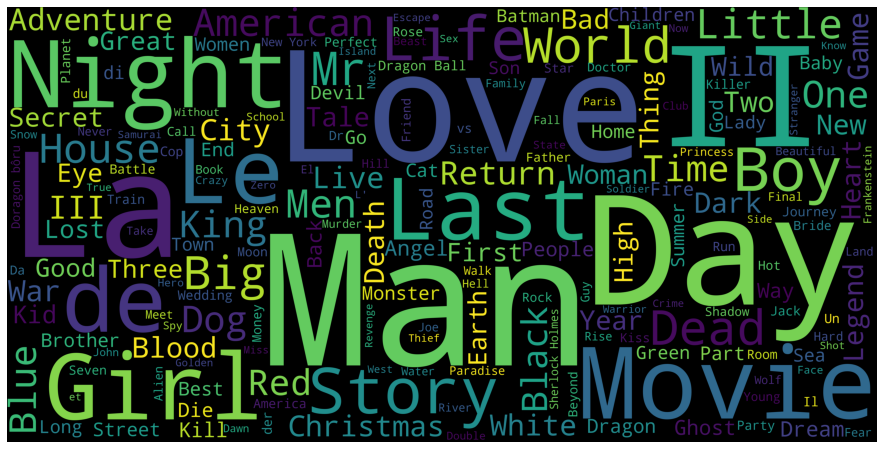

In [12]:
# Import new libraries
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Create a wordcloud of the movie titles
movies = pd.read_csv('/content/drive/My Drive/ml-latest-small/movies.csv')
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

Movie names with words like Day, Love, Life, Night, Man, Dead etc are among the most commonly occuring words.

### Ratings
Statistics and distribution.

In [13]:
# Get summary statistics of rating
ratings['rating'].describe()

count    99559.000000
mean         3.500728
std          1.042432
min          0.500000
25%          3.000000
50%          3.500000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


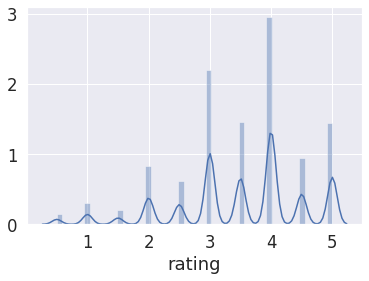

In [14]:
# Import seaborn library
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# Display distribution of rating
sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))


It appears that users are quite generous in their ratings. The mean rating is 3.58 on a scale of 5. Half the movies have a rating of 4 and 5. W personally think that a 5-level rating skill wasn’t a good indicator as people could have different rating styles (i.e. person A could always use 4 for an average movie, whereas person B only gives 4 out for their favorites). Each user rated at least 20 movies, so we doubt the distribution could be caused just by chance variance in the quality of movies.
Let's also take a look at a subset of 20 movies with the highest rating.

In [15]:
# Join all 3 files into one dataframe
dataset = pd.merge(movies, ratings)
# Display 20 movies with highest ratings
dataset[['title','genres','rating']].sort_values('rating', ascending=False).head(20)

,title,genres,rating
27283,"Deer Hunter, The (1978)",Drama|War,5.0
12850,Philadelphia (1993),Drama,5.0
77561,"Scanner Darkly, A (2006)",Animation|Drama|Mystery|Sci-Fi|Thriller,5.0
54476,Gladiator (2000),Action|Adventure|Drama,5.0
32071,Men in Black (a.k.a. MIB) (1997),Action|Comedy|Sci-Fi,5.0
12834,Philadelphia (1993),Drama,5.0
47404,Perfect Blue (1997),Animation|Horror|Mystery|Thriller,5.0
12836,Philadelphia (1993),Drama,5.0
32068,Men in Black (a.k.a. MIB) (1997),Action|Comedy|Sci-Fi,5.0
23969,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,5.0


### Genres
The genres variable will surely be important while building the recommendation engines since it describes the content of the film (i.e. Animation, Horror, Sci-Fi). A basic assumption is that films in the same genre should have similar contents. I'll attempt to see exactly which genres are the most popular.

In [16]:
# Make a census of the genre keywords
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 4361],
 ['Comedy', 3756],
 ['Thriller', 1894],
 ['Action', 1828],
 ['Romance', 1596]]

The top 5 genres are, in that respect order: Drama, Comedy, Action, Thriller, and Romance. I'll show this on a wordcloud too in order to make it more visually appealing.

### Keywords

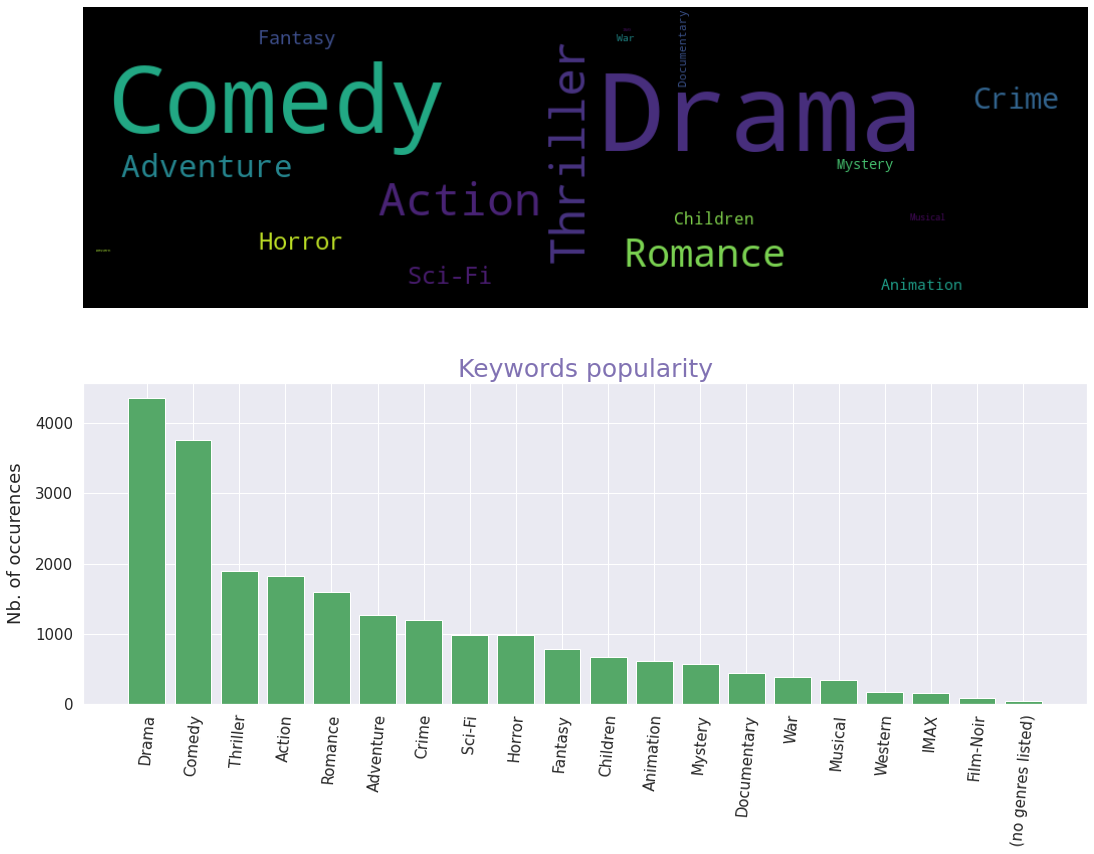

In [17]:
# UPPER PANEL: WORDCLOUD
fig = plt.figure(1, figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)
#_______________________________________________________
# I define the dictionary used to produce the wordcloud
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 55.0 # define the color of the words
#________________________________________________________
wordcloud = WordCloud(width=1000,height=300, background_color='black', 
                      max_words=1628,relative_scaling=1,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis('off')
#_____________________________________________
# LOWER PANEL: HISTOGRAMS
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax2.bar(x_axis, y_axis, align = 'center', color='g')
#_______________________
plt.title("Keywords popularity",color='m',fontsize = 25)
plt.show()

In [18]:
df = pd.merge(ratings,movies,on='movieId')
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()
df.groupby('title')['rating'].count().sort_values(ascending=False).head()
grading = pd.DataFrame(df.groupby('title')['rating'].mean())
grading['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
grading.sort_values('num of ratings')

,rating,num of ratings
title,,
'71 (2014),4.000000,1
"Late Shift, The (1996)",2.500000,1
Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004),2.000000,1
Late Night Shopping (2001),4.500000,1
Late Marriage (Hatuna Meuheret) (2001),3.500000,1
...,...,...
"Matrix, The (1999)",4.192446,278
"Silence of the Lambs, The (1991)",4.161290,279
"Shawshank Redemption, The (1994)",4.421824,307


Forrest Gump (1994) is the most rated film.

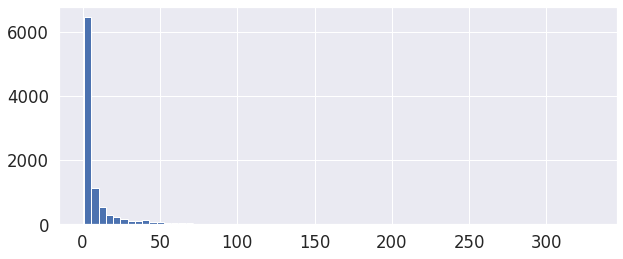

In [19]:
plt.figure(figsize=(10,4))
grading['num of ratings'].hist(bins=70);

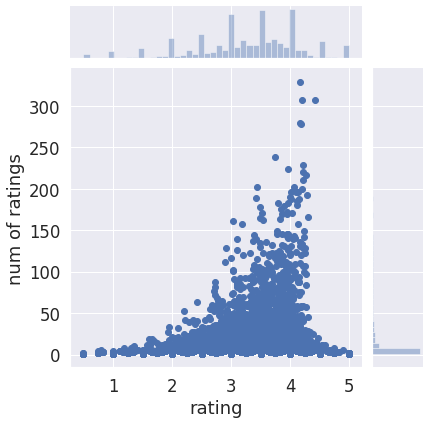

In [20]:
sns.jointplot(x='rating',y='num of ratings',data=grading);

We can see from the plots that the most frequent movie rating given is 4. This also results in an unbalanced target variable, therefore we will need to address this during machine learning.